<i><h1 align='center' style='color:skyblue'>Data Visualization with Python (II)</h1></i>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

plt.style.use('_classic_test_patch')
%matplotlib inline

### Now we create some random walk data —

In [2]:
#Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

### And do a simple plot —

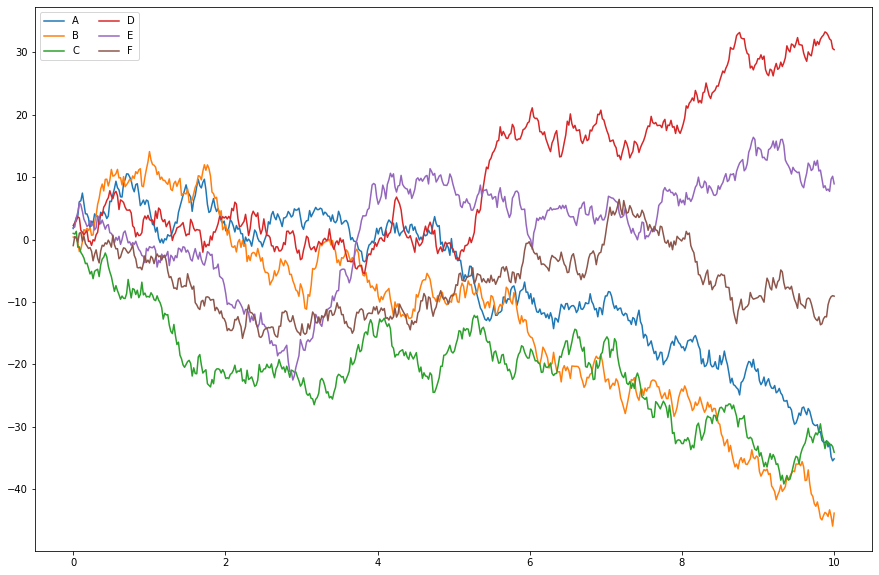

In [3]:
#Plot the data with Matplotlib defaults
plt.figure(figsize = (15, 10))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')
plt.savefig('Plots/plot1.jpg');

### Using Seaborn

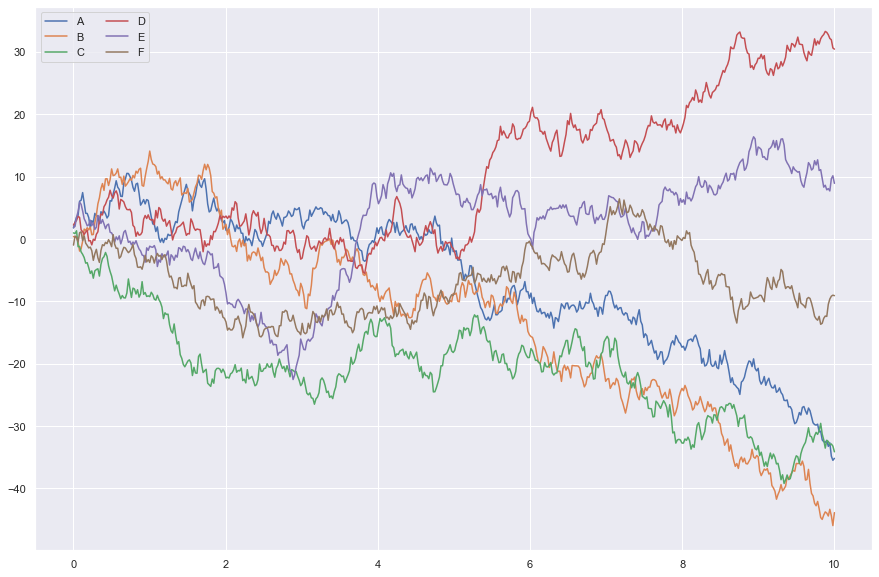

In [4]:
import seaborn as sns
sns.set()

#same plotting code as above!
plt.figure(figsize = (15, 10))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')
plt.savefig('Plots/plot2.jpg');

### Histograms, KDE, and densities
Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables. We have seen that this is relatively straightforward in Matplotlib —

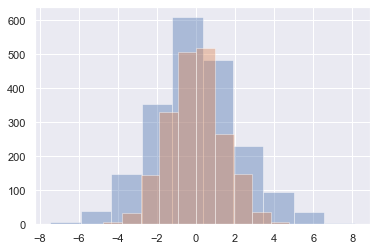

In [5]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.4)
    plt.savefig('Plots/plot3.jpg')

### Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with sns.kdeplot —

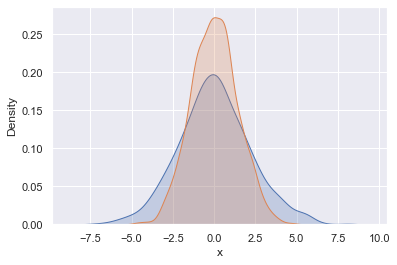

In [6]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)
    plt.savefig('Plots/plot4.jpg')

### Histograms and KDE can be combined using distplot —

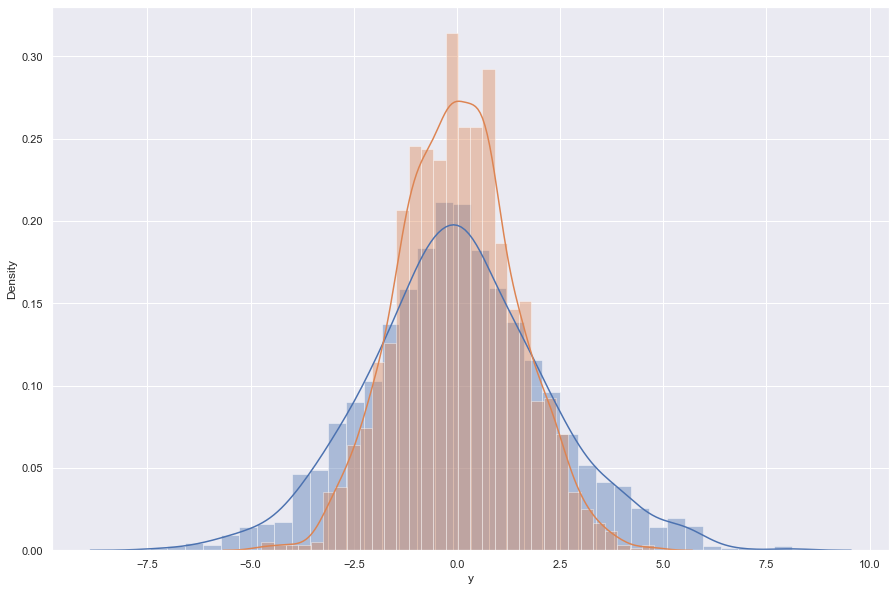

In [7]:
plt.figure(figsize = (15, 10))
sns.distplot(data['x'])
sns.distplot(data['y'])
plt.savefig('Plots/plot5.jpg');

### If we pass the full two-dimensional dataset to kdeplot, we will get a two-dimensional visualization of the data —

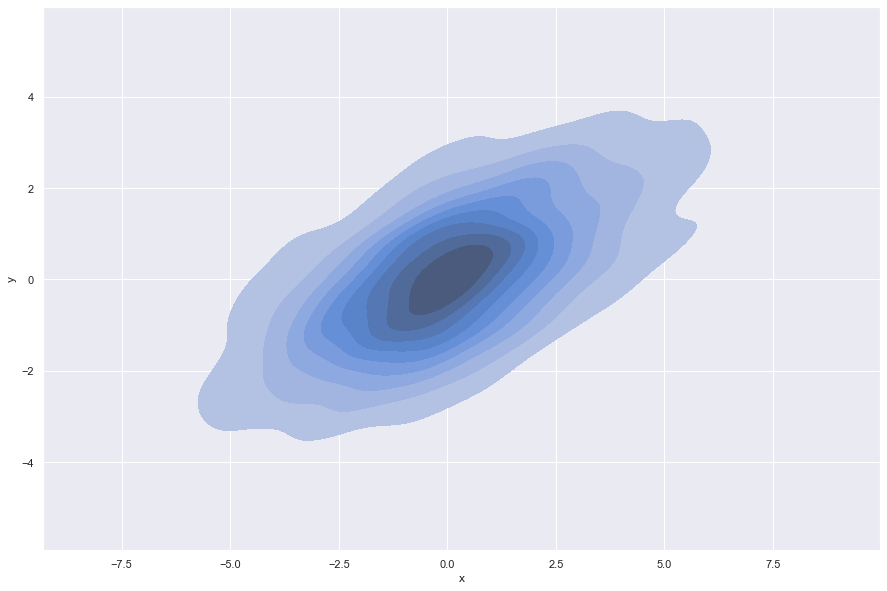

In [8]:
plt.figure(figsize = (15, 10))
sns.kdeplot(x = data['x'], y=data['y'], shade=True, outline=True)
plt.savefig('Plots/plot6.jpg');

### We can see the joint distribution and the marginal distributions together using sns.jointplot. For this plot, we'll set the style to a white background —

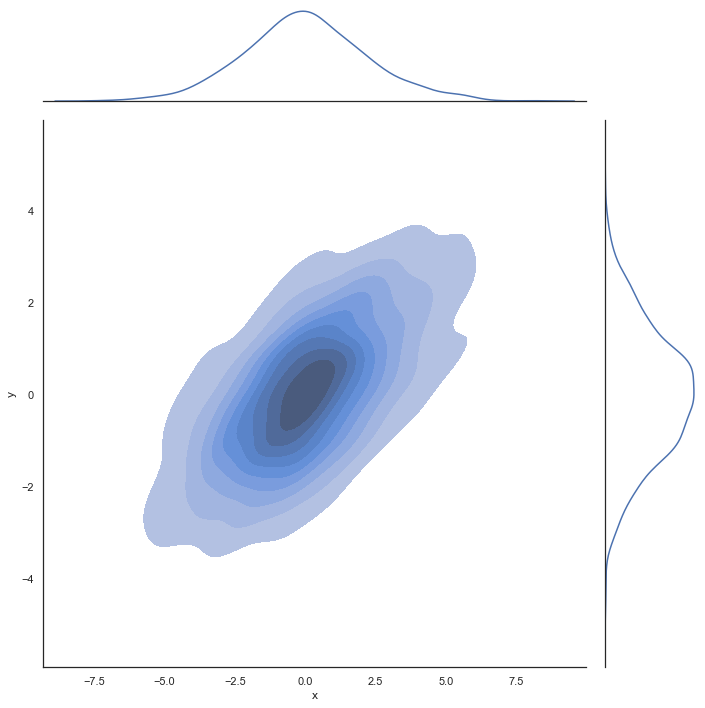

In [9]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde', shade=True, size=10)
    plt.savefig('Plots/plot7.jpg');

### There are other parameters that can be passed to jointplot—for example, we can use a hexagonally based histogram instead —

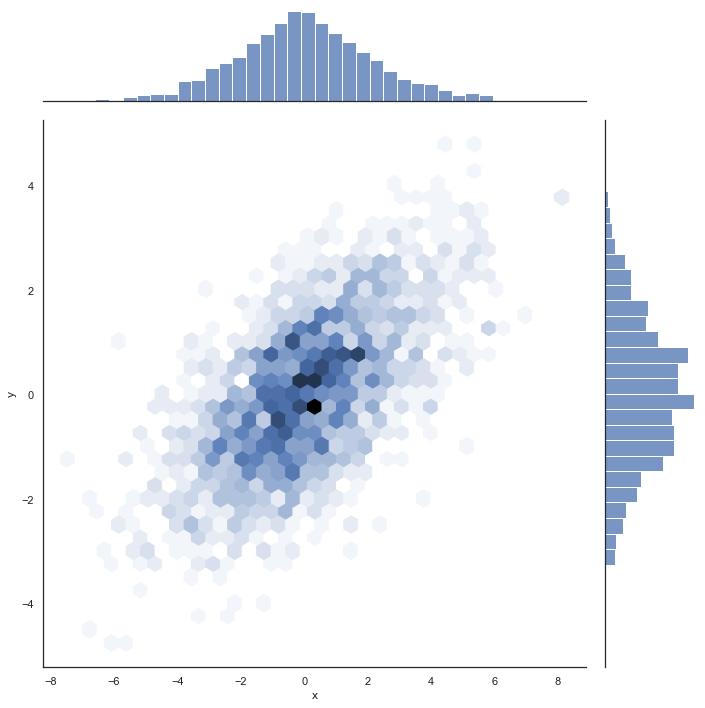

In [10]:
with sns.axes_style('white'):
    sns.jointplot(x=data['x'], y=data['y'], kind='hex' ,size=10)
    plt.savefig('Plots/plot8.jpg')

### Pair Plots

When you generalize joint plots to datasets of larger dimensions, you end up with **pair plots**.

__We’ll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species —__

### Visualizing the multidimensional relationships among the samples is as easy as calling sns.pairplot —


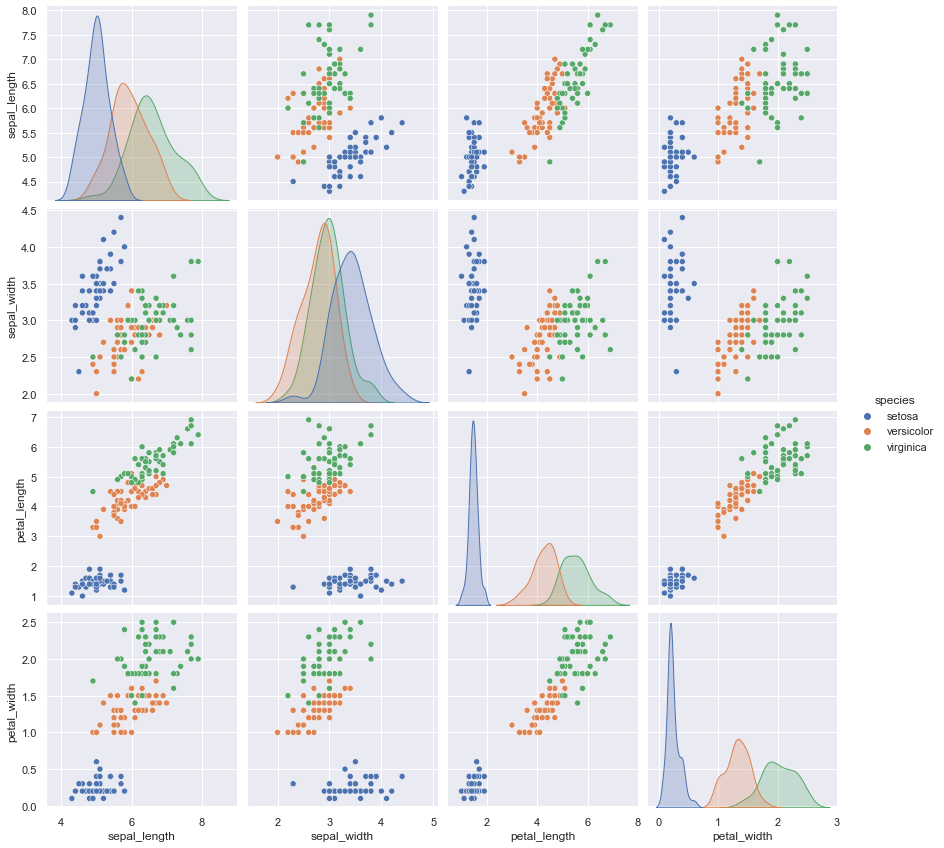

In [11]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species', size=3)
plt.savefig('Plots/plot9.jpg');

In [12]:
tips = sns.load_dataset("tips")

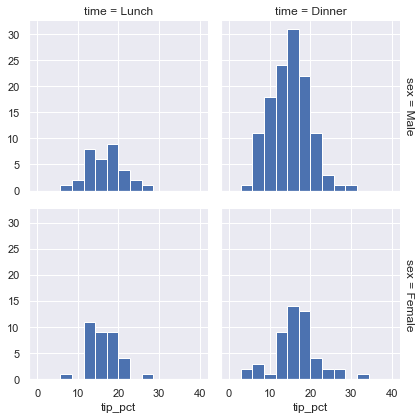

In [13]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))
plt.savefig('Plots/plot10.jpg');

### Factor Plots
Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter —

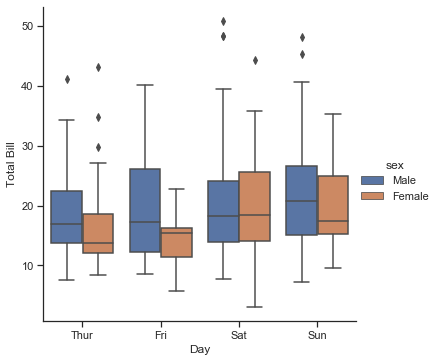

In [14]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box", size=5, aspect=1)
    g.set_axis_labels("Day", "Total Bill")
    plt.savefig('Plots/plot11.jpg');

### Joint Distributions
Similar to the pair plot we saw earlier, we can use sns.jointplot to show the joint distribution between different datasets, along with the associated marginal distributions —

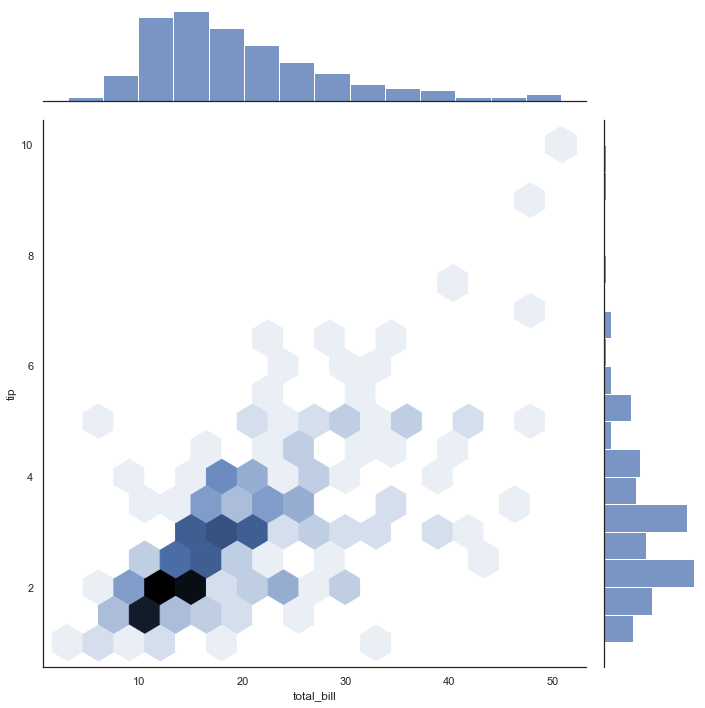

In [15]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex', size = 10)
    plt.savefig('Plots/plot12.jpg')

### The joint plot can even do some automatic kernel density estimation and regression —

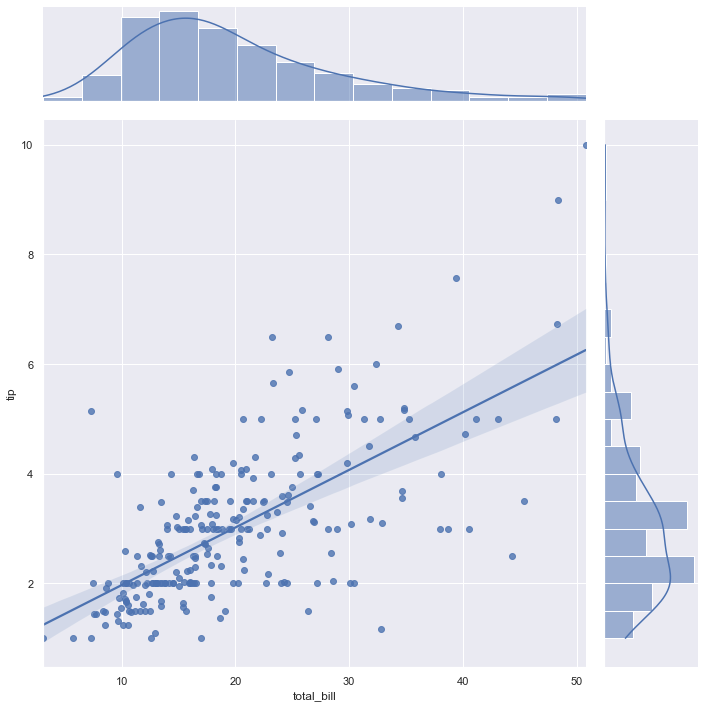

In [16]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg',size=10)
plt.savefig('Plots/plot13.jpg');

### Bar Plots
We have already seen **Bar Plots with Matplotlib**, now let us try doing the same with Seaborn.

Time series can be plotted using sns.factorplot. In the following example, we'll use the **Planets dataset**.

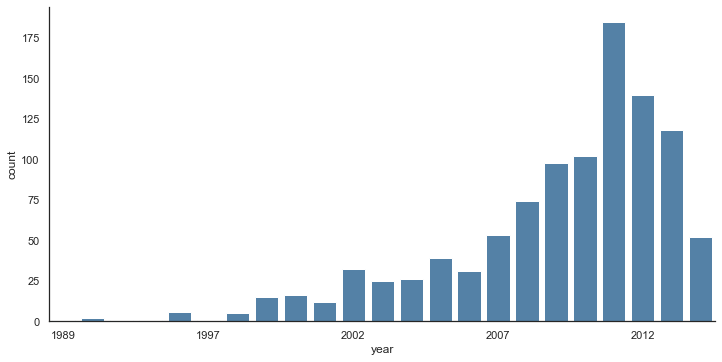

In [17]:
planets = sns.load_dataset('planets')
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)
    plt.savefig('Plots/plot14.jpg')

### We can learn more by looking at the method of discovery of each of these planets —

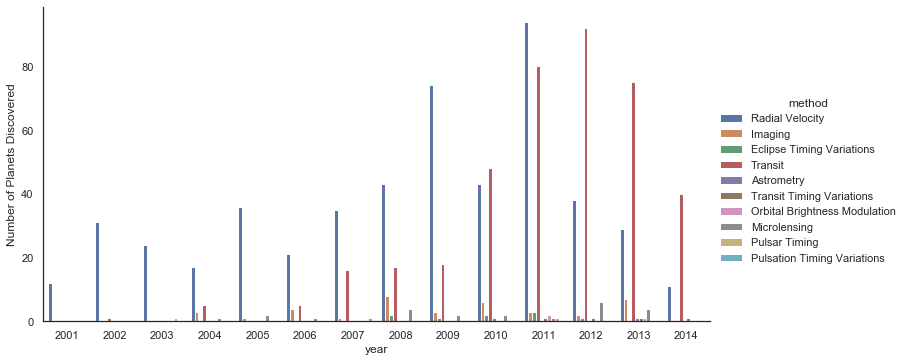

In [18]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, size = 5, aspect=2.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')
    plt.savefig('Plots/plot15.jpg')

In [19]:
df = pd.read_csv('Data/marathon-data.csv')
df.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [20]:
df.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [21]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

df = pd.read_csv('Data/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
df.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [22]:
df.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [23]:
df['split_sec'] = df['split'].astype('int64') / 1E9
df['final_sec'] = df['final'].astype('int64') / 1E9
df.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


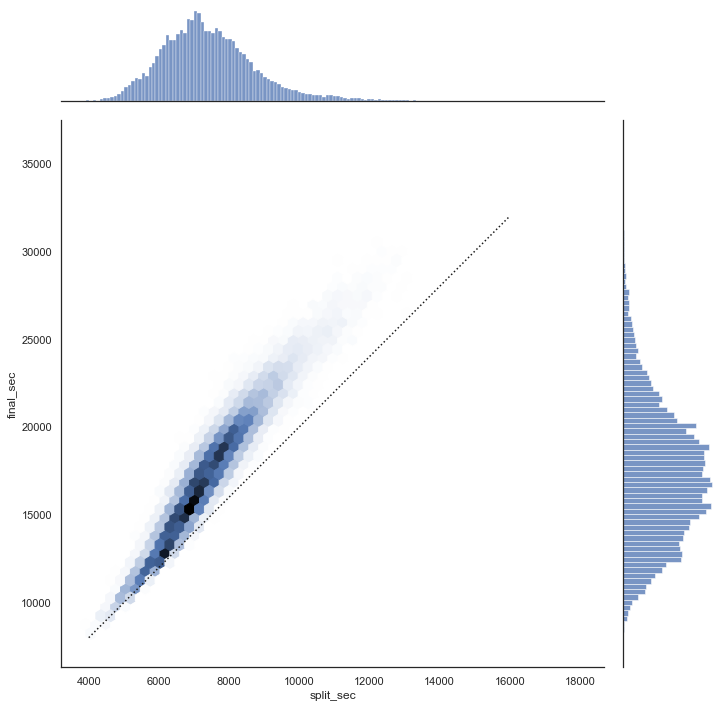

In [24]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", df, kind='hex', size=10)
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')
    plt.savefig('Plots/plot16.jpg')

In [25]:
df['split_frac'] = 1 - 2 * df['split_sec'] / df['final_sec']
df.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


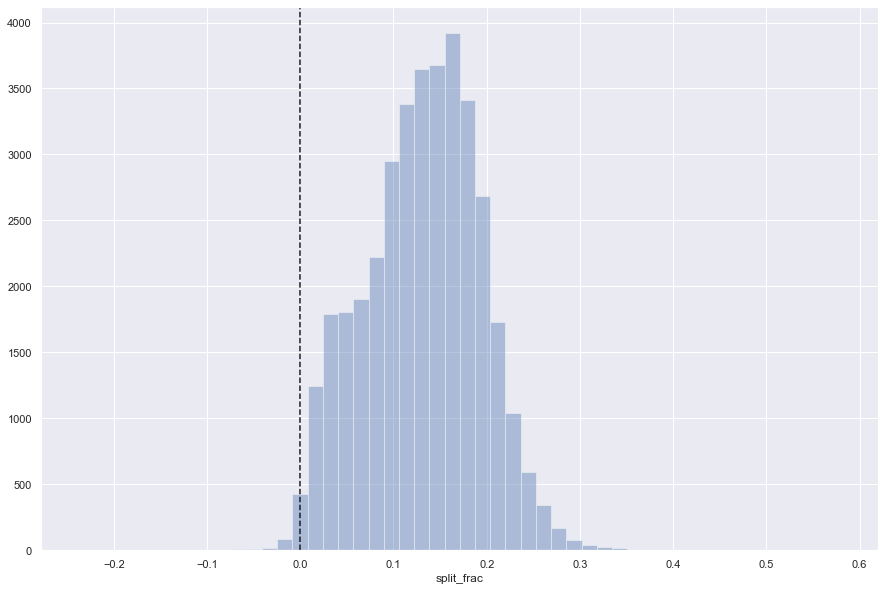

In [26]:
plt.figure(figsize=(15,10))
sns.distplot(df['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--")
plt.savefig('Plots/plot17.jpg');

In [27]:
sum(df.split_frac < 0)

251

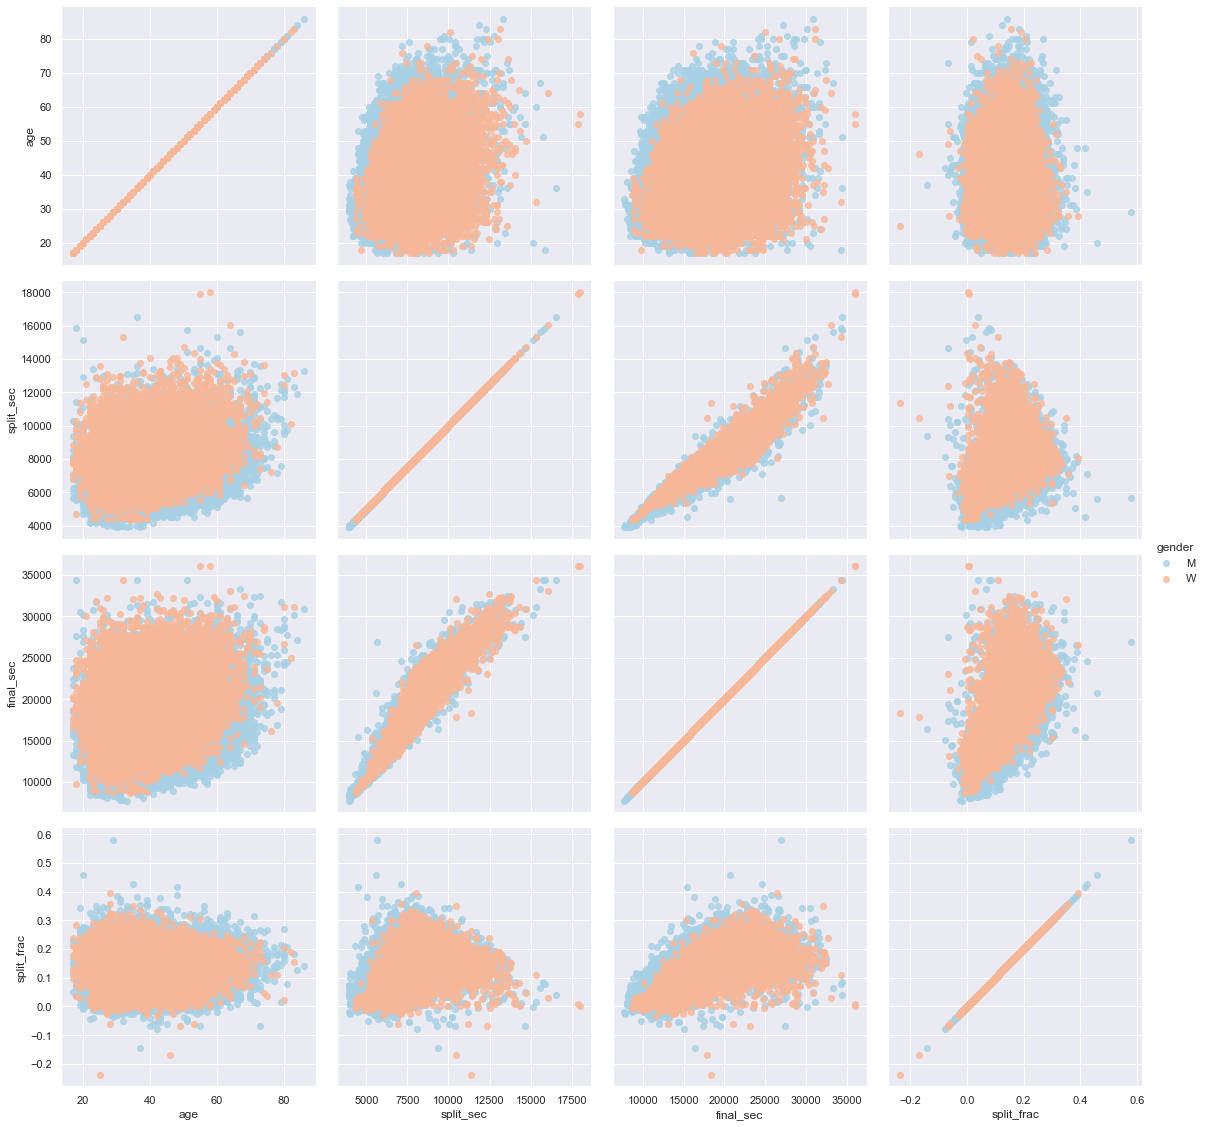

In [28]:
g = sns.PairGrid(df, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r', size=4)
g.map(plt.scatter, alpha=0.8)
g.add_legend()
plt.savefig('Plots/plot18.jpg');

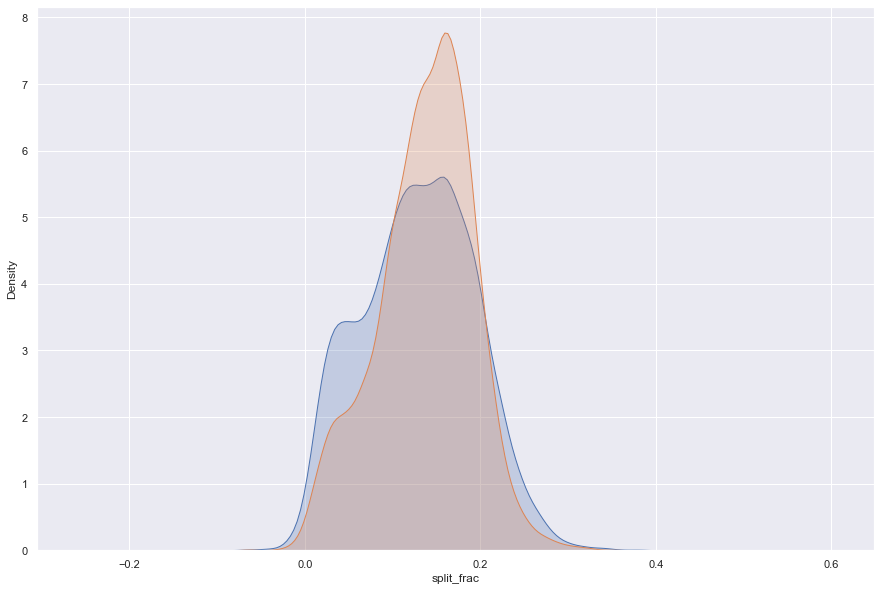

In [29]:
plt.figure(figsize=(15, 10))
sns.kdeplot(df.split_frac[df.gender=='M'], label='men', shade=True)
sns.kdeplot(df.split_frac[df.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac')
plt.savefig('Plots/plot19.jpg');

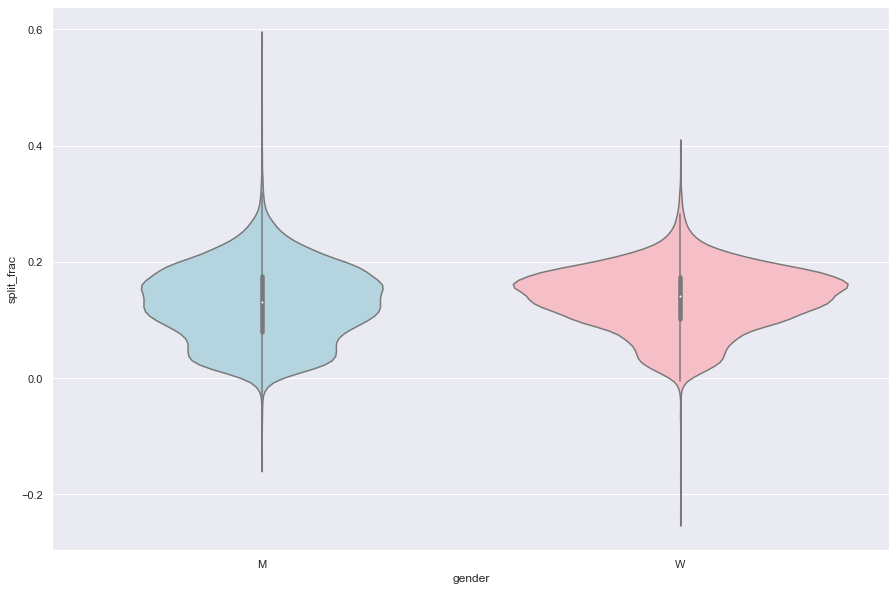

In [30]:
plt.figure(figsize=(15, 10))
sns.violinplot("gender", "split_frac", data=df,
               palette=["lightblue", "lightpink"])
plt.savefig('Plots/plot20.jpg');


In [31]:
df['age_dec'] = df.age.map(lambda age: 10 * (age // 10))
df.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


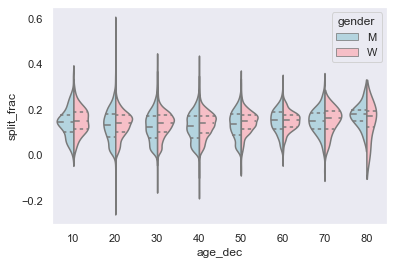

In [32]:
men = (df.gender == 'M')
women = (df.gender == 'W')

with sns.axes_style(style='dark'):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=df,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"])
    plt.savefig('Plots/plot21.jpg');

In [33]:
(df.age > 80).sum()

7

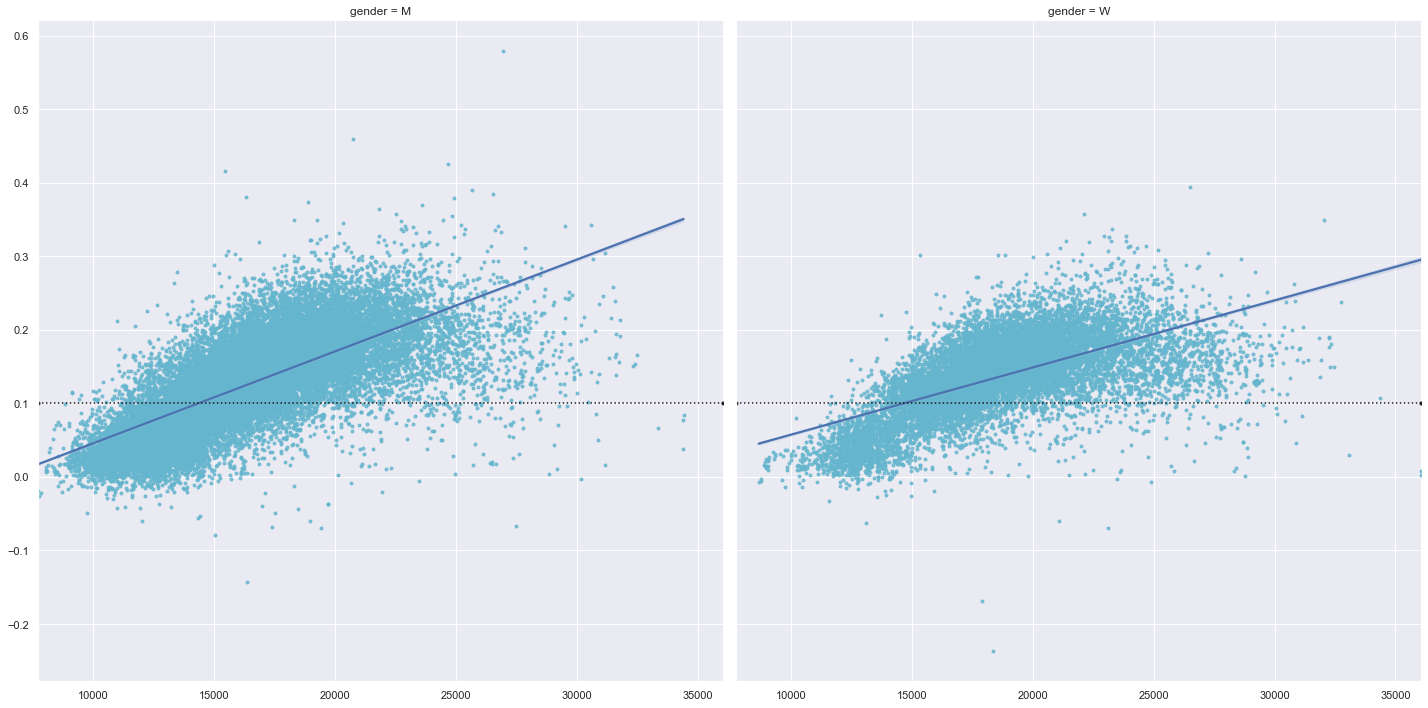

In [34]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=df,
               markers=".", scatter_kws=dict(color='c'), size=10)
g.map(plt.axhline, y=0.1, color="k", ls=":")
plt.savefig('Plots/plot22.jpg');